### Библиотеки

In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline, FunctionTransformer

### Выполнение лучшей модели

In [2]:
path_train = 'train_house_B.csv'
path_test  = 'test_house_B.csv'

In [3]:
data_train = pd.read_csv(path_train)
data_test = pd.read_csv(path_test)

In [4]:
data_test.duplicated().sum()

0

In [5]:
X = data_train.drop(columns = ['price'])
y = data_train.loc[:,'price'].values

In [6]:
#выбранные признаки
mask = ['0', '3', '15', '16', '18', '19', '20', '21', '22', '24', '25', '27', '28']

In [7]:
#обучение модели на всем наборе данных

pipe = make_pipeline(FunctionTransformer(lambda x: x[mask]),
                     SVR(kernel = 'linear', C = 10000, gamma = 0.1))

pipe.fit(X, y);

In [8]:
pipe['functiontransformer'].transform(data_test).head(3)

,0,3,15,16,18,19,20,21,22,24,25,27,28
0,-0.091662,0.405623,-0.734539,-0.465315,-0.263991,-0.141322,-0.554035,0.047278,1.421812,0.355976,0.224410,-0.679063,-0.478408
1,-0.091662,0.405623,1.361397,-0.465315,-0.263991,-0.141322,-0.554035,-1.308863,-0.570187,0.355976,-0.929397,-0.679063,1.307431
2,-1.406286,0.405623,-0.734539,-0.465315,-0.263991,3.136137,-0.554035,0.047278,1.421812,1.517692,2.532024,1.472618,-0.478408


In [9]:
print(f"выбранные признаки:\n{pipe['svr'].feature_names_in_.tolist()}\n".replace("[", "").replace("]", ""))

выбранные признаки:
'0', '3', '15', '16', '18', '19', '20', '21', '22', '24', '25', '27', '28'



In [15]:
#предсказание
y_predict = pipe.predict(data_test)

In [16]:
print(y_predict.shape, data_test.shape)

(137,) (137, 29)


In [17]:
y_predict

array([4710410.74009051, 3902427.83133191, 7089087.39554766,
       6969494.81114073, 6911702.42992649, 4385096.57938105,
       4518374.54381044, 4697870.33917131, 3454832.26903878,
       3857331.29703087, 5799736.02364964, 4665167.67002591,
       4091042.22167299, 4450672.78840117, 4951321.99455835,
       6352036.0628411 , 3499928.80333982, 3072667.79086152,
       6399457.86894383, 4727353.4725167 , 3632667.74558222,
       4415616.31179602, 5123471.03283217, 2692163.5436293 ,
       3590264.40338779, 3174832.29167844, 6049327.01473765,
       3252163.49834999, 4912365.22079606, 5560902.98802249,
       4004663.64180797, 4004663.64180797, 6613878.56706437,
       2660000.09304553, 2884663.64449418, 4685447.61933245,
       3763620.43820992, 5033206.74244335, 3072667.79086152,
       5495071.17604017, 5113302.36300827, 6153304.09026189,
       3352667.76822187, 5189047.24185229, 3780000.09035931,
       5023264.12312461, 7416365.95873549, 3636597.37067317,
       5336877.07563956,

(137,) (137,)
Отрицательные цены -  0
Max Error: 5,402,450
 
----------------------
   MAPE Error: 17.33
----------------------


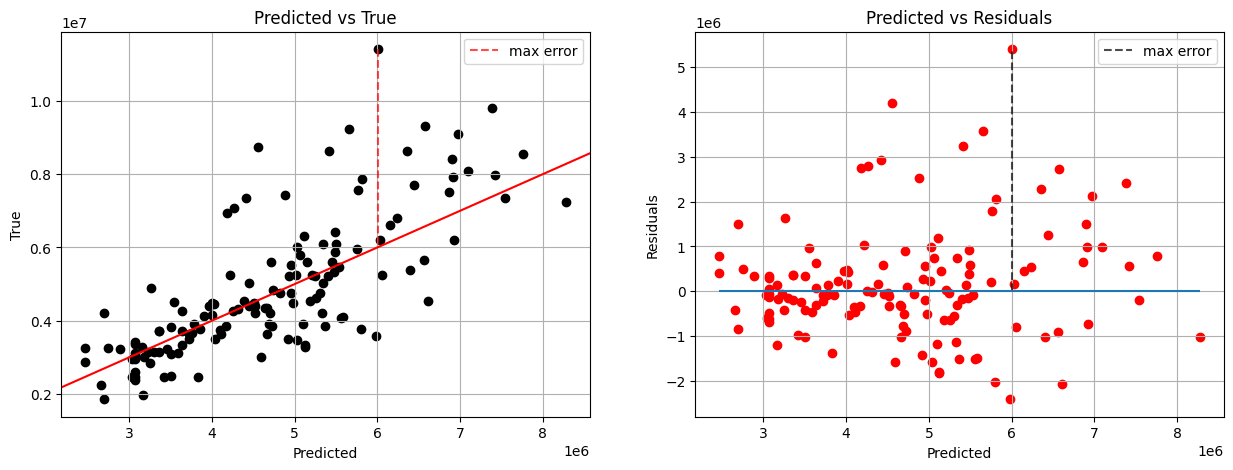

In [18]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_B.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [19]:
mask = mask

import pickle
with open('saved_dictionary_b.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,10,1
1,27,airconditioning
2,2,area
3,12,area bathrooms
4,4,area bedrooms
5,5,area stories
6,15,basement
7,22,bathrooms
8,19,bathrooms stories
9,21,bedrooms
